Roll : 21226

Single Layer Perceptron using `sklearn.linear_model.Perceptron()`

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

### Creating Synthetic Data

In [ ]:
def generate_synthetic_data(n_samples=100, n_features=2, n_classes=2, cluster_std=1.0, random_state=42):
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes,
                      cluster_std=cluster_std, center_box=(-10.0, 10.0),
                      random_state=random_state)
    return X, y

### Plotting Datapoints + Line of classification

In [ ]:
# Function to plot data points and classification line
def plot_data_with_line(X, y, w=None, title="Perceptron"):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    if w is not None:
        w = np.squeeze(w)  # Ensure weights are 1D
        xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
        ymin, ymax = (-w[0] - w[1] * xmin) / w[2], (-w[0] - w[1] * xmax) / w[2]
        plt.plot([xmin, xmax], [ymin, ymax], 'k-')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

### Perceptron Algorithm using Scikit-Learn

In [ ]:
def perceptron_algorithm(X_train, y_train):
    clf = Perceptron(random_state=42)
    clf.fit(X_train, y_train)
    return np.concatenate([clf.intercept_, clf.coef_[0]])

### Implementation

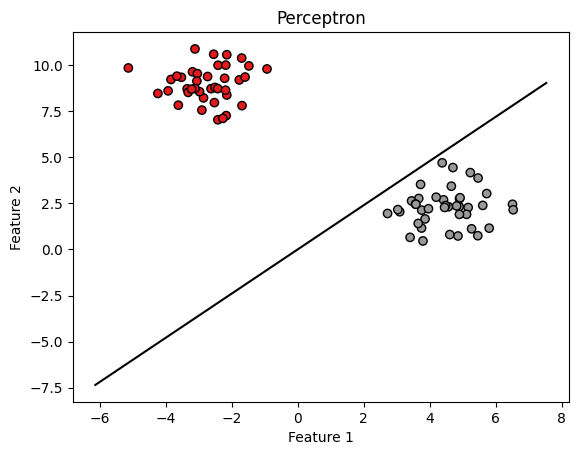

In [ ]:
X, y = generate_synthetic_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform the Perceptron algorithm
perceptron_weights = perceptron_algorithm(X_train, y_train)
plot_data_with_line(X_train, y_train, perceptron_weights, title="Perceptron")